## Forecasting Time series

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import numpy as np

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 10 + 10))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_val, y_val = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
### naive model/forecasting(baseline Metrics)
y_pred = X_val[:, -1]
np.mean(keras.losses.mean_squared_error(y_val, y_pred))

0.015467215

In [ ]:
## another kind of baseline model

model = Sequential([
    layers.Flatten(input_shape=[50, 1]), 
    layers.Dense(1)
])
model.compile(loss="mse", 
              optimizer="sgd", 
              metrics=["mse"])
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
219/219 [==============================] - 1s 2ms/step - loss: 0.0979 - mse: 0.0979
Epoch 2/2
219/219 [==============================] - 1s 2ms/step - loss: 0.0068 - mse: 0.0068


#### Implementing Simple RNN

In [ ]:
model = Sequential([
    layers.SimpleRNN(1, input_shape=[None, 1])
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1657
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1366
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1105
Epoch 4/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0870A: 0s - loss: 0.0
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0665
Epoch 6/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0486
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0338A: 0s - loss: 0.
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0227A: 0s
Epoch 9/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0158
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0123
Epoch 11/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0109
Epoch 12/20
219/219 [==============================] - 1s 6ms/step - 

#### Deep RNNs

In [ ]:
model = Sequential([
                    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
                    layers.SimpleRNN(20, return_sequences=True), 
                    layers.SimpleRNN(1)
])
model.compile(loss="mse", 
              optimizer="sgd")
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 7s 22ms/step - loss: 0.0137
Epoch 2/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0057
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0046
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0040
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0037
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0035
Epoch 7/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0033
Epoch 8/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0032
Epoch 9/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0031
Epoch 10/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0030
Epoch 11/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0029
Epoch 12/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0028
Epoch 13/20
2

In [ ]:
# another approach
model2 = Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
        layers.SimpleRNN(20), 
        layers.Dense(1)
])
model.compile(loss="mse", 
              optimizer="sgd")
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
219/219 [==============================] - 6s 22ms/step - loss: 0.0023
Epoch 2/5
219/219 [==============================] - 5s 22ms/step - loss: 0.0023
Epoch 3/5
219/219 [==============================] - 5s 23ms/step - loss: 0.0023
Epoch 4/5
219/219 [==============================] - 5s 22ms/step - loss: 0.0023
Epoch 5/5
219/219 [==============================] - 5s 23ms/step - loss: 0.0023


#### Forecasting Several time Steps Ahead

In [ ]:
n_steps = 50
series = generate_time_series(1, n_steps+10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

y_pred = X[:, n_steps:]

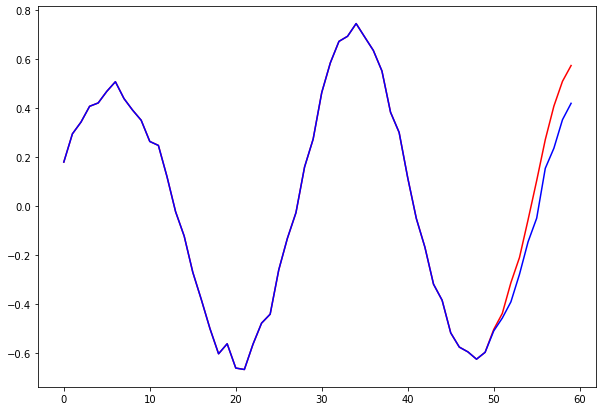

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=[10, 7])
plt.plot(np.concatenate([X_new, y_pred], axis=1).reshape(60), c="r")
plt.plot(series.reshape(60), c="b")

In [ ]:
# another way
n_steps=50
series = generate_time_series(10000, n_steps+10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_val, y_val = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
model3 = Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
        layers.SimpleRNN(20), 
        layers.Dense(10)
])

Epoch 1/20
219/219 [==============================] - 5s 16ms/step - loss: 0.0896
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0320
Epoch 3/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0211
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0175
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0156
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0141
Epoch 7/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0134
Epoch 8/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0125
Epoch 9/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0118
Epoch 10/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0114
Epoch 11/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0110
Epoch 12/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0104
Epoch 13/20
2

In [ ]:
model3.compile(loss="mse", 
               optimizer="sgd")
model3.fit(X_train, y_train, epochs=20)

In [ ]:
y_pred = model3.predict(X_new)
y_pred

array([[-0.5185277 , -0.37400153, -0.40514252, -0.27571216, -0.21001248,
        -0.00837921,  0.05449845,  0.16363265,  0.23465975,  0.2973817 ]],
      dtype=float32)

In [ ]:
# another thing we can do is using sequence-to-vector approach
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_val = Y[7000:9000]
Y_test = Y[9000:]


In [ ]:
model4 = Sequential([
        layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
        layers.SimpleRNN(20, return_sequences=True),
        layers.TimeDistributed(layers.Dense(10))
])

In [ ]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer=keras.optimizers.Adam(learning_rate=1e-2)

In [ ]:
model4.compile(loss="mse", 
              optimizer=optimizer, 
              metrics=[last_time_step_mse])

In [ ]:
model4.fit(X_train, Y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 6s 18ms/step - loss: 0.0290 - last_time_step_mse: 0.0181
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0205 - last_time_step_mse: 0.0094
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0177 - last_time_step_mse: 0.0080
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0155 - last_time_step_mse: 0.0075
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0138 - last_time_step_mse: 0.0070
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0133 - last_time_step_mse: 0.0070
Epoch 7/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0130 - last_time_step_mse: 0.0070
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0129 - last_time_step_mse: 0.0068
Epoch 9/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0127 - last_time_step_mse: 0.0067
E

## Handling Long Sequences

In [ ]:
class LNSimpleRNNCell(layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = layers.LayerNormalization()
        self.activation = keras.activations.get(activation)

    def call(self, inputs, states):
        outputs, new_state = self.simple_rnn_cell(inputs, states)
        norm_output = self.activation(self.layer_norm(outputs))
        return norm_output, [norm_output]

In [ ]:
model = Sequential([
                    layers.RNN(LNSimpleRNNCell(20), return_sequences=True, 
                               input_shape=[None, 1]), 
                    layers.RNN(LNSimpleRNNCell(20), return_sequences=True), 
                    layers.TimeDistributed(layers.Dense(10))
])


#### LSTM

In [ ]:
model5 = Sequential([
                     layers.LSTM(20, return_sequences=True, input_shape=[None, 1]), 
                     layers.LSTM(20, return_sequences=True), 
                     layers.TimeDistributed(layers.Dense(10))
])

In [ ]:
# another way using RNN layer
model6 = Sequential([
                     layers.RNN(layers.LSTMCell(20), return_sequences=True, 
                                input_shape=[None, 1]), 
                     layers.RNN(layers.LSTMCell(20), return_sequences=True), 
                     layers.TimeDistributed(layers.Dense(10))
])

#### GRU

In [ ]:
model7 = Sequential([
                     layers.Conv1D(filters=20, kernel_size=4, strides=2, 
                                   padding="valid", input_shape=[None, 1]), 
                     layers.GRU(20, return_sequences=True), 
                     layers.GRU(20, return_sequences=True), 
                     layers.TimeDistributed(layers.Dense(10))
])
model7.compile(
    loss="mse", optimizer="adam", metrics=[last_time_step_mse]
)

In [ ]:
model7.fit(X_train, Y_train[:, 3::2], epochs=20, 
           validation_data=(X_val, Y_val[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 12s 32ms/step - loss: 0.0505 - last_time_step_mse: 0.0423 - val_loss: 0.0227 - val_last_time_step_mse: 0.0153
Epoch 2/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0170 - last_time_step_mse: 0.0108 - val_loss: 0.0130 - val_last_time_step_mse: 0.0081
Epoch 3/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0122 - last_time_step_mse: 0.0073 - val_loss: 0.0113 - val_last_time_step_mse: 0.0065
Epoch 4/20
219/219 [==============================] - 6s 25ms/step - loss: 0.0114 - last_time_step_mse: 0.0068 - val_loss: 0.0111 - val_last_time_step_mse: 0.0065
Epoch 5/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0108 - last_time_step_mse: 0.0064 - val_loss: 0.0104 - val_last_time_step_mse: 0.0060
Epoch 6/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0103 - last_time_step_mse: 0.0060 - val_loss: 0.0101 - val_last_time_step_mse: 0.0063
Epoch 7/20
219/219 [=

#### WaveNet

In [ ]:
model8 = Sequential()
model8.add(layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model8.add(layers.Conv1D(filters=20, kernel_size=2, padding="causal", 
                            activation="relu", dilation_rate=rate))
model8.add(layers.Conv1D(filters=10, kernel_size=1))
model8.compile(loss="mse", 
              optimizer="adam", metrics=[last_time_step_mse])
model8.fit(X_train, Y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.0484 - last_time_step_mse: 0.0345
Epoch 2/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0158 - last_time_step_mse: 0.0066
Epoch 3/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0131 - last_time_step_mse: 0.0058
Epoch 4/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0121 - last_time_step_mse: 0.0055
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0115 - last_time_step_mse: 0.0052
Epoch 6/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0113 - last_time_step_mse: 0.0051
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0110 - last_time_step_mse: 0.0049
Epoch 8/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0109 - last_time_step_mse: 0.0048
Epoch 9/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0108 - last_time_step_mse: 0.0048
E

## Exercise

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import numpy as np
import requests
import tarfile
import os
import pandas as pd

In [32]:
r = requests.get("https://homl.info/bach")
open('bach.tgz', 'wb').write(r.content)

117793

In [33]:
tarfile.open("bach.tgz").extractall()

In [34]:
train_path = "/content/jsb_chorales/train"
train_filepaths = list(map(lambda f: os.path.join(train_path, f), os.listdir("/content/jsb_chorales/train")))
valid_path = "/content/jsb_chorales/valid"
valid_filepaths = list(map(lambda f: os.path.join(valid_path, f), os.listdir("/content/jsb_chorales/valid")))
test_path = "/content/jsb_chorales/test"
test_filepaths = list(map(lambda f: os.path.join(test_path, f), os.listdir("/content/jsb_chorales/test")))

In [82]:
def get_dataset(filepaths):
    data = np.zeros(shape=(len(filepaths), 700, 4))
    for i, f in enumerate(train_filepaths):
        tf = pd.read_csv(f).to_numpy()
        for j, t in enumerate(tf):
            for k, r in enumerate(t):
                data[i, j, k] = r
    return data

In [96]:
train_shape = []
for f in valid_filepaths:
    train_shape.append(pd.read_csv(f).to_numpy().shape)

In [97]:
np.array(train_shape)[:, 1].max()

4

In [99]:
# train_data = get_dataset(train_filepaths)
valid_data = get_dataset(valid_filepaths)
# test_data = get_dataset(test_filepaths)

IndexError: ignored